# High-dimensional data analysis- HW 1
#### Group 8:
--------------------

In [1]:
# imports packages 
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv
from sklearn.datasets import load_wine
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib as mpl

In [2]:
# define seed so we get the same result
random.seed(300)
np.random.seed(300)

# Question 1
--------------

## a. Dataset

In [3]:
# Read the data
temp = pd.read_csv("Chemical Composion of Ceramic.csv")         
temp.shape

(88, 19)

In [4]:
# remove the first 2 columns
data = temp.iloc[:,2:]
print ('The shape of the data is:', data.shape)

The shape of the data is: (88, 17)


In [5]:
# function that seperate the data so the 4 column ('SiO2') will be Y and the rest data is the X.
# the function get the data frame and return the features and the labels seperately
def get_data_labels(data):
    features = data.loc[:, data.columns != 'SiO2']      # Get the columns of all the feature except the labels  
    labels_row = data.loc[:,data.columns =='SiO2']      # Get the label column
    return features,labels_row

In [6]:
# call the function and get X and Y
x,y = get_data_labels(data)

In [7]:
#  Add a column of ones to the data in the first position
x['ones'] = 1
cols = x.columns.tolist()
cols = cols[-1:] + cols[:-1]    # reorder the columns
x = x[cols]
print ('Now the data is:')
x

Now the data is:


,ones,Na2O,MgO,Al2O3,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,1,0.62,0.38,19.61,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,1,0.57,0.47,21.19,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,1,0.49,0.19,18.60,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,1,0.89,0.30,18.01,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,1,0.03,0.36,18.41,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,1,0.34,0.55,12.37,5.33,8.06,0.06,1.61,1250,10,90,30,250,520,30,140,690
84,1,0.72,0.34,12.20,6.19,6.06,0.04,1.27,1700,60,110,10,270,540,40,120,630
85,1,0.23,0.24,12.99,5.25,7.15,0.05,1.29,750,40,100,0,240,470,40,120,480
86,1,0.14,0.46,12.62,4.34,11.03,0.05,1.20,920,40,90,20,230,470,40,130,1100


In [8]:
# create a function that get the dataframe and return updated dataframe with new 6 columns that are a linear combination
# of the sum of 2 existing columns (except the 'ones' column)
def create_new_6_features(df):
    # we can choose from all the columns except the 'ones' column
    cols = df.columns.tolist()[1:]
    # list that will save the 2 choosen columns so we we will not repeat the same 
    tuples = []
    # until we will get 6 new combinations
    while len(tuples) < 6:
        first_col = random.choice(cols)
        second_col = random.choice(cols)
        #  we choose 2 diffrenet columns and combinations
        if first_col == second_col:
            continue
        if (first_col,second_col) in tuples or (second_col,first_col) in tuples:
            continue
        tuples.append((first_col,second_col))
    # save a new feature as sum of the 2 columns for each combination in the excisting data
    for i in range(len(tuples)):
        df['new-feature'+str(i+1)] = df[tuples[i][0]] + df[tuples[i][1]]
        
    return df

# call the function to get the updated data
x = create_new_6_features(x)
print ('The shape of the update data is:', x.shape)

The shape of the update data is: (88, 23)


## b. Stability of W

In [9]:
# sample 60 rows from the data for 3 times (A,B,C) and save the indexes
XA_index = x.sample(n=60, random_state=300).index
XB_index = x.sample(n=60, random_state=200).index
XC_index = x.sample(n=60, random_state=100).index

# from the indexes save the 3 sub sets for x and y seperatly
XA = x.loc[XA_index]
YA = y.loc[XA_index]
 
XB = x.loc[XB_index]
YB = y.loc[XB_index]

XC = x.loc[XC_index]
YC = y.loc[XC_index]

In [10]:
# the function get x and y data and caculate the coefficients, the function return the coefficients.
def calculate_coef(x,y):
    X = x.to_numpy()
    Y = y.to_numpy()
    W = inv(X.T.dot(X)).dot(X.T).dot(Y)
    return W

In [11]:
# call to the caculate_coef function for the 3 sub-sets and for each one save the coefficients in the coef_lst
coef_lst = []
ABC_lst = [[XA,YA],[XB,YB],[XC,YC]]
for i in ABC_lst:
    coef_lst.append(calculate_coef(i[0],i[1]))

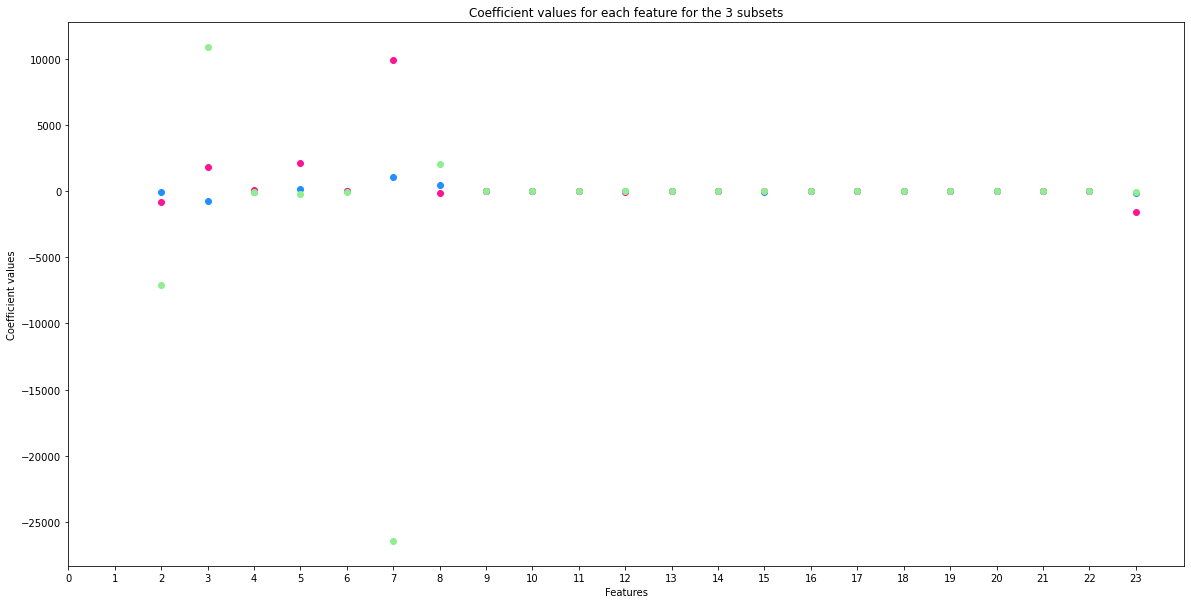

In [12]:
# create scatter plot so the X axis be the 23 features without the first column and the y axis is the coefficient
# the scatter will be in different color for each subset
x_bar = range(2,24)
fig, ax = plt.subplots(figsize=(20, 10))
# create the scatter for the Wa
plt.scatter(x_bar,
            coef_lst[0][1:], 
            c='dodgerblue')
# create the scatter for the Wb 
plt.scatter(x_bar,
            coef_lst[1][1:], 
            c='deeppink')

# create the scatter for the Wc
plt.scatter(x_bar,
            coef_lst[2][1:], 
            c='lightgreen')
# add titles and set the x axis
ax.set_xticks(np.arange(len(x_bar)+2))
plt.title('Coefficient values for each feature for the 3 subsets')
plt.xlabel('Features')
plt.ylabel('Coefficient values')
plt.show()

<b> Explanation: </b> <br> As can be seen above, most of the features received a zero value. The features that are none-zero are different due to the different samples from the data in eacch subset. It is difficult to determine what is the right value for each W_i because of the coralation between the columns. In addition to the correlation that could be in this data set, we have created 6 new corralated features (liniear combinations by sum of 2 existing columns), which makes difficult in calculationg the coefficient and get the correct values. <br> We can see that a small change in the data (by the selection of 66 rows from 80) makes a huge change in the coefficient (in the firsts features)- it means that the W_i are unstable.
In features 4,6 and from feature 9 until feature 22 the values are around 0. Therefore, we can infer that these features do not affect the results.

## c. Ridge regression

In [13]:
# the function get x,y data and lambda and caculate the coefficients with penalty by Lasso, the function return the coefficients.
def calculate_coef_ridge(x,y,lamda):
    X = x.to_numpy()
    Y = y.to_numpy()
    W = inv(X.T.dot(X)+lamda*np.identity(x.shape[1])).dot(X.T).dot(Y)
    return W

In [14]:
# call to the caculate_coef_ridge function for the 3 sub-sets with specific alpha (lambda)
# and for each one save the coefficients in the coef_lst. It returns the coef_lst.
# In addition create scatter plot so the X axis be the 23 features without the first column and the y axis is the coefficient
# the scatter will be in different color for each subset
def ridge_plot(ABC_lst,alpha1):  
    coef_lst=[]
    for i in ABC_lst:
        coef_lst.append(calculate_coef_ridge(i[0], i[1],alpha1))
    x_bar = range(2,24)
    fig, ax = plt.subplots(figsize=(20, 10))
    # create the scatter for the Wa
    plt.scatter(x_bar,
                coef_lst[0][1:], 
                c='dodgerblue')
    # create the scatter for the Wb 
    plt.scatter(x_bar,
                coef_lst[1][1:], 
                c='deeppink')

    # create the scatter for the Wc
    plt.scatter(x_bar,
                coef_lst[2][1:], 
                c='lightgreen')
    
    # add titles and set the x and y axis
    ax.set_xticks(np.arange(len(x_bar)+2))
    plt.ylim([-1.2,1])
    plt.title('Coefficient values for each feature for the 3 subsets')
    plt.xlabel('Features')
    plt.ylabel('Coefficient values')
    plt.show()
    
    return coef_lst
   

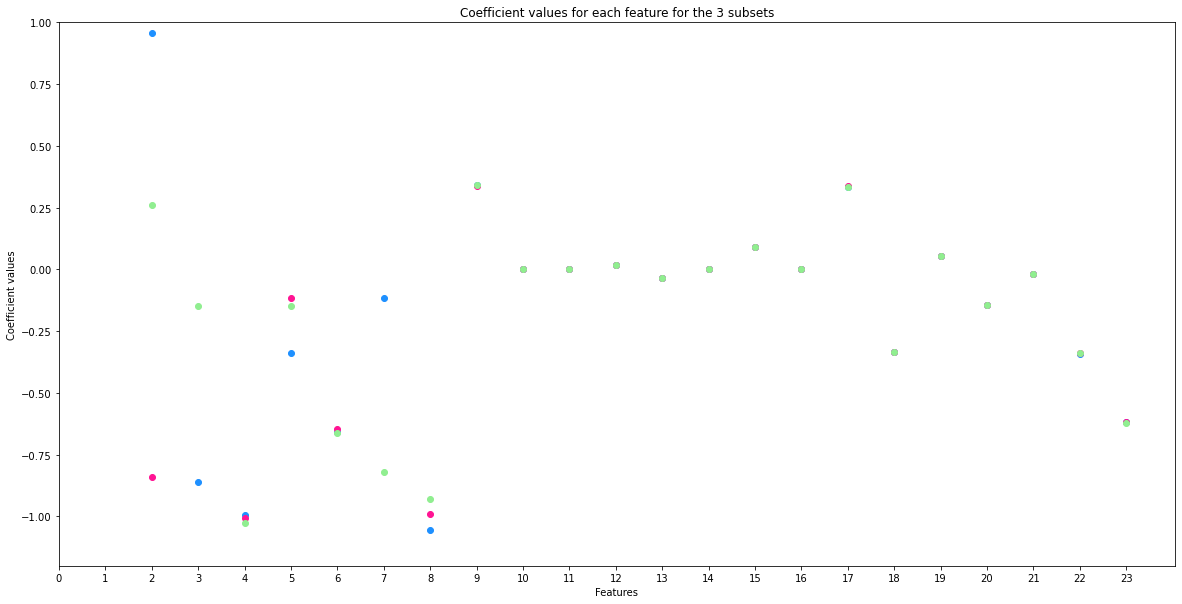

In [15]:
# call to ridge function with the 3 sun-sets and lambda = 0.000001
smallest = ridge_plot(ABC_lst,0.000001)

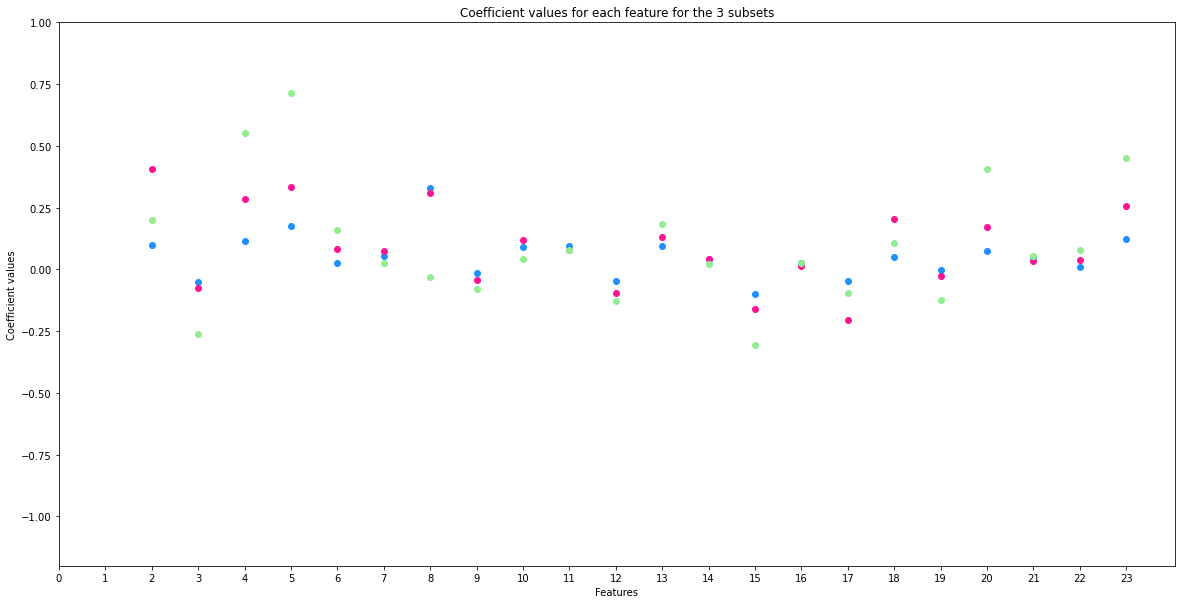

In [16]:
# call to ridge function with the 3 sun-sets and lambda = 50
mid = ridge_plot(ABC_lst,50)

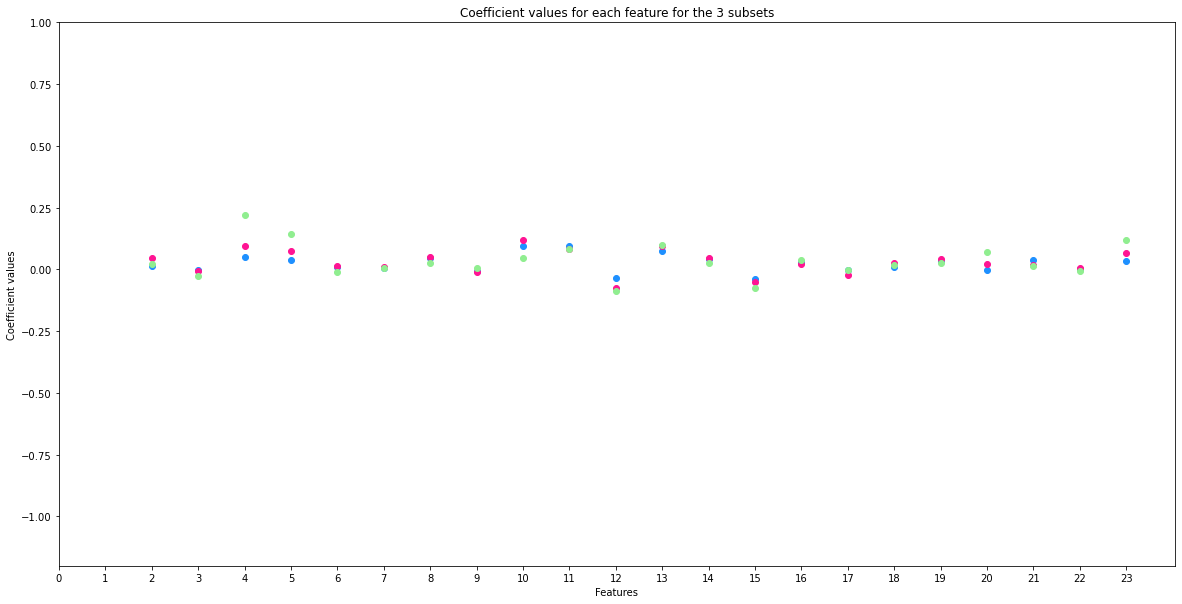

In [17]:
# call to ridge function with the 3 sun-sets and lambda = 500
largest = ridge_plot(ABC_lst,500)

<b> Explanation for our choise: </b> <br>
We chose a small value for lamda in wich the coefficients are stable across all three subset - 0.000001. <br>
In addition, we can see that all the distance for the smallest lambda is less than 5 for the 3 sub sets. Therefore, we chose to use the snallest lambda where we can see stability and in addition we did not choose a large lambda that could take us away from the optimal hyper plane (for the MSE).

In [18]:
dist1 = np.linalg.norm(smallest[0]-smallest[1])
dist2 = np.linalg.norm(smallest[0]-smallest[2])
dist3 = np.linalg.norm(smallest[2]-smallest[1])

print('The distance between W_a, W_b is', dist1)
print('The distance between W_a, W_c is', dist2)
print('The distance between W_b, W_c is', dist3)

The distance between W_a, W_b is 2.9654153393013316
The distance between W_a, W_c is 1.2483231644895563
The distance between W_b, W_c is 2.804930052850241


<b> Explanation: </b> <br>The contribution of the ridge regression is that it makes the Matrix a diagonal matrix and we can inverse it with stability. As can be seen at the graphs above, even for small values of lambda, there is a stability in the coefficients values. In addition it prevents an overfitting in the data and shrinks the coefficients. <br>
However, it has some drawbacks: <br>
First, as long as lambda grows, we pay by our accuracy and more and more coefficients are close to zero (so we get the stability). As a result of it, we are moving away from the optimal hyper plane so the SSE measure will increase and will be unaccurate and not optimal. <br>
Whenever we decide to add a lambda parameter for the purpose of punishing the coefficients we will have to examine how much we are willing to pay in moving away from the optimal SSE for stability.

## d. Lasso regression

In [19]:
# split the data into train and test sets so the test will be 20% of the data.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True, random_state=300)

In [20]:
# choose 10 different values for akpha and convert them to string for the plot
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
str_alphas = [str(x) for x in alphas]

In [21]:
# initilaize 2 lists: the first for the mse values for each alpha and second for the coefficients for each alpha
MSE_lst = []
coef_lst = []
# for each alpha we will fit the data with lasso regression, save it's coefficients
for alpha1 in alphas:
    clf = linear_model.Lasso(alpha=alpha1)
    clf.fit(x_train, y_train)
    coef_lst.append(clf.coef_)
    # we predict the labels and then calculate the MSE and save it into the list
    y_test_predict = clf.predict(x_test)
    MSE_lst.append(mean_squared_error(y_test,y_test_predict))

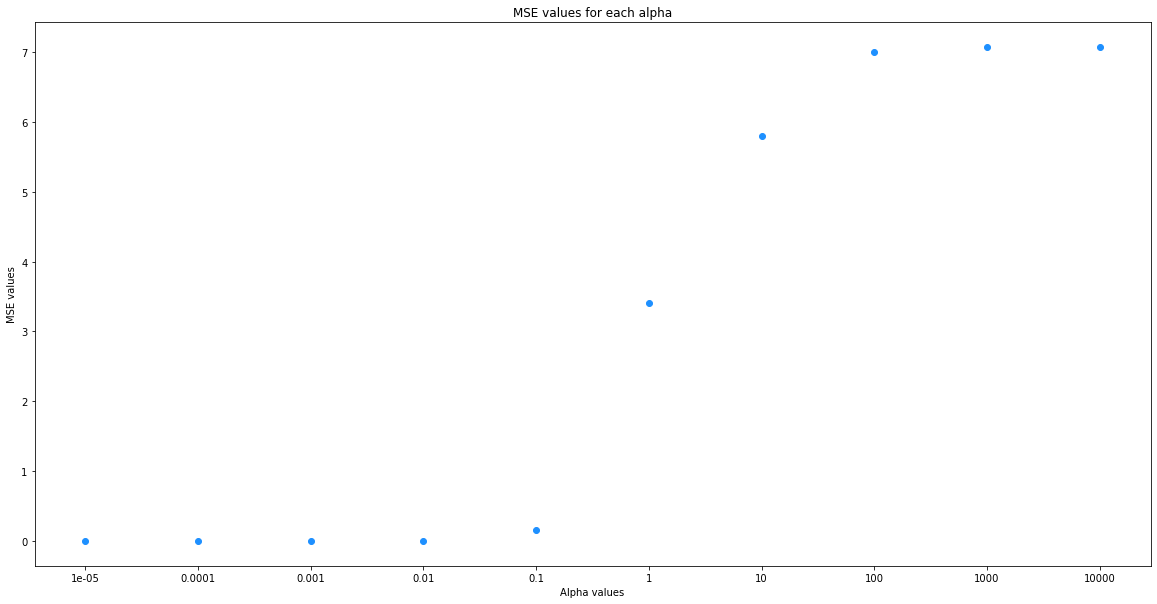

In [22]:
# create a scatter for the data with the MSE values for each alpha
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(str_alphas,
            MSE_lst, 
            c='dodgerblue')
# add titles
plt.title('MSE values for each alpha')
plt.xlabel('Alpha values')
plt.ylabel('MSE values')
plt.show()

<b> Explanation for our choice: </b> <br>
We chose alpha=0.1. <br> 
Our choice was made according to the elbow method, according to which we chose the point where the MSE rises relatively minimally and after that the payment in MSE growth is too large. <br> 
That is, at this point we will stop where the relative pay will be minimal and we will gain an MSE that is not very far from the optimal and also better coefficients for the regression.

In [23]:
chosen_index = alphas.index(0.1)

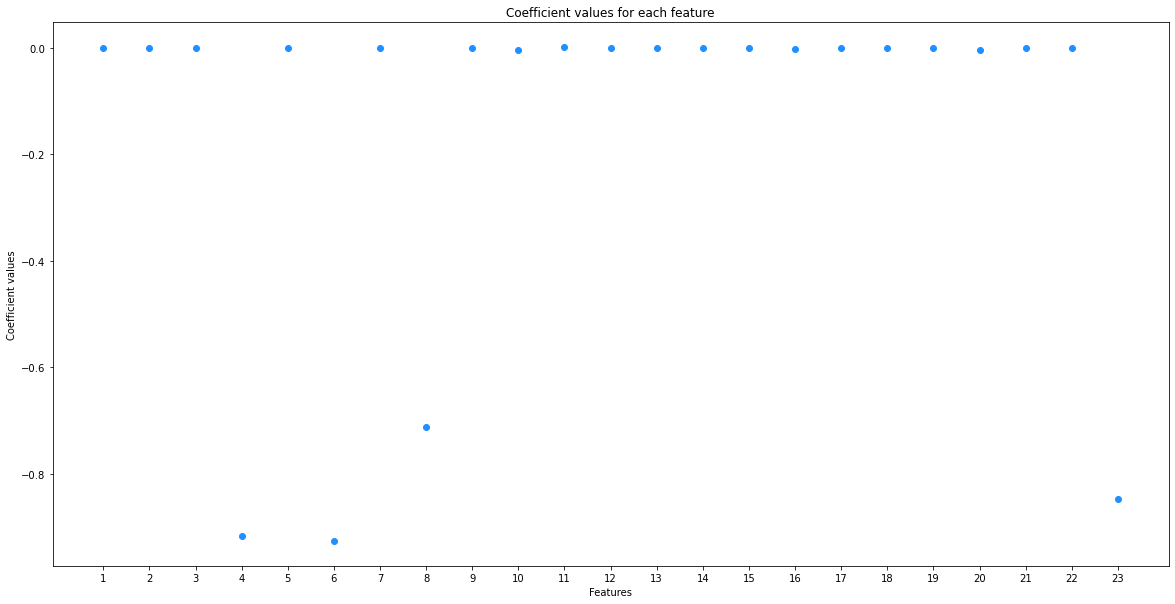

In [24]:
# create a scatter for the data with the coefficient values only for alpha=0.1
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(range(1,24),
            coef_lst[chosen_index], 
            c='dodgerblue')
# add titles and set the x axis
ax.set_xticks(range(1,24))
plt.title('Coefficient values for each feature')
plt.xlabel('Features')
plt.ylabel('Coefficient values')
plt.show()

In [25]:
print ('The coefficients for alpha=0.1 for each feature are')
coef_lst[chosen_index]

The coefficients for alpha=0.1 for each feature are


array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -9.16784890e-01,
       -0.00000000e+00, -9.26998074e-01, -0.00000000e+00, -7.12973468e-01,
        0.00000000e+00, -3.52538566e-03,  2.26281297e-03, -4.06985938e-04,
        7.36135208e-04,  1.03770705e-03, -0.00000000e+00, -1.29703991e-03,
       -0.00000000e+00, -2.41301583e-04,  0.00000000e+00, -4.21068914e-03,
       -0.00000000e+00, -8.85295491e-05, -8.47825949e-01])

<b> Explanation: </b> <br>
We have 4 features that are non-zero for the value of alpha=0.1. <br>
As can be seen at the graph above, the rest of the features are close to zero (9 features) and some of them are exactly zero (10 features with the 'ones' column). <br>
For this regression, we can infer that there are 4 important features and for the reggresion model, we will choose these four.
The lasso model is makes a selection for the best features and ensures that the other unimportant features will be zeroes.
-------------------------------------


# Question 3
----------------------

## a. Understanding PCA

In [26]:
# this function get the data and the d dimension, calculate the mean&std and normalized the data
# then calculate the covariance matrix, eigenvalues & eigenvectors and apply the projection
def myPca(data,d):
    mean = data.mean()               # get the mean of each column
    std = data.std()                 # get the std of each column
    data_normed = (data-mean)/std    # Normalized the data
    cov_matrix = data_normed.cov()   # get the cov martix                      
    lambdas,w = LA.eig(cov_matrix) # get the eigenvalues & eigenvectors                   
    idx = lambdas.argsort()[::-1]  # sort the eigenvalues & eigenvectors in descending order   
    lambdas = lambdas[idx]
    w = w[:,idx]
    first_d = w[:d,:]              # save the first d eigenvectors
    first_d_df = data_normed.dot(first_d.T) # get the projected the data
    return mean, std, data_normed, w, lambdas,first_d_df

In [27]:
# read the wine data and labeles
data = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
label = load_wine().target

#### reconstruction plot

In [28]:
temp_data=data.iloc[:,3:6] # we choose to take columns 4,5,6
mean, std, data_normed, w, lambdas,first_d_df = myPca(temp_data,2) # use PCA with 2 dimensions

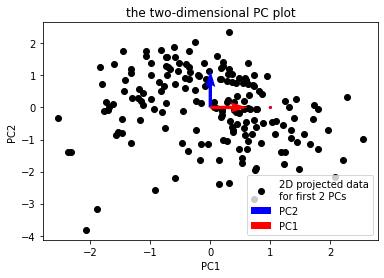

In [29]:
# plot the 2 pc we got after the transformation- Projection of the data onto the first 2 PCs
plt.scatter(first_d_df[0],first_d_df[1],color='black', label='2D projected data\nfor first 2 PCs')   # plot the scaterr
plt.quiver([0,0],[1,0],color='blue',width=.01, label='PC2') # add the arrows for the axises
plt.quiver([1,0],[0,0],color='red',width=.01, label='PC1')
plt.xlabel('PC1')                                           # add labels
plt.ylabel('PC2')
plt.title('the two-dimensional PC plot')                    # add title
plt.legend()
plt.show()

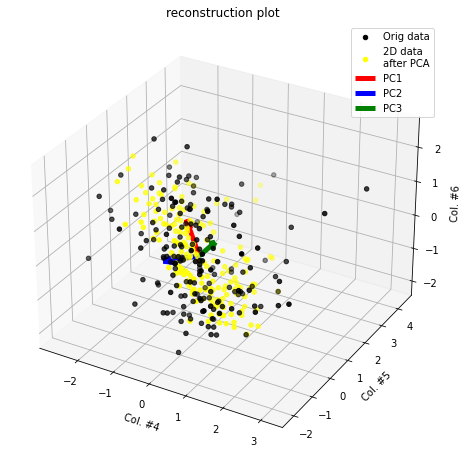

In [30]:
first_d_df[2] = 0 # add a column with 0 to zero the the third column
reconstruction_df = first_d_df.dot(w) # go back to the original 3D 

# plot 3D scatter with the original data and the reconstruction data
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
# plot the scatter for the original data and for the 2D data after PCA
ax.scatter(data_normed['alcalinity_of_ash'],data_normed['magnesium'],data_normed['total_phenols'],color='black',label='Orig data')
ax.scatter(reconstruction_df[0],reconstruction_df[1],reconstruction_df[2],color='yellow',label='2D data \nafter PCA')
# add labels
ax.set_xlabel('Col. #4')
ax.set_ylabel('Col. #5')
ax.set_zlabel('Col. #6')
# add arrows for the PCs axises
ax.quiver(0,0,0,w.T[0][0],w.T[0][1],w.T[0][2],color='red',linewidth=5,label='PC1')
ax.quiver(0,0,0,w.T[1][0],w.T[1][1],w.T[1][2],color='blue',linewidth=5,label='PC2')
ax.quiver(0,0,0,w.T[2][0],w.T[2][1],w.T[2][2],color='green',linewidth=5,label='PC3')
plt.legend()
plt.title('reconstruction plot') # add title
plt.show()


## b. Dry bean classification using PCA and KNN

### b.1. Data preparation

In [31]:
dry_bean_df = pd.read_excel('Dry_Bean_Dataset.xlsx')  # read the data

In [32]:
# change the class columns into integers
l = list(dry_bean_df['Class'].unique())  # save list for all the unique values in the class column
d = {}   # create dictionary- save for value- new unique number
c = 1
# assign for each value a number
for i in l:
    d[i] = c
    c += 1
    
# create a function that will replace any value in the corresponding number that belongs to it
def change_class(col):
    global d
    return d[col]

# apply the function from above on the class column
dry_bean_df['Class']=dry_bean_df['Class'].apply(change_class)

# shuffle the data and split it into features and lables
shuffle = dry_bean_df.sample(frac=1)
labels = shuffle['Class'] 
shuffle = shuffle.drop('Class',axis=1)

<b>Note: </b>the data is already shuffled, so we chose the 10k first rows for the train and the rest of the rows for the validation

In [33]:
# split the data into train+test and validation 
train_data=shuffle.iloc[:10000,]
train_labels=labels.iloc[:10000]
validation_data=shuffle.iloc[10000:]
validation_labels=labels.iloc[10000:]

### b.2. Classification using PCA+KNN - building the model

In [34]:
# this function split the data into K folds. for each fold we use myPca to dimensionality reduction to the test and train. 
# then we use KNN with k=3 to calculate the accuracy for each fold and returns the average accuracy. 
# the function get as inputs the data and lables, the k for kfold and d for the numbers of columns we want to use in mypca.
def cross_validation(data,labels,k,d):
    kfold = KFold(k)   # create kfold object
    acc_lst = []       # create list- save the k values of the accuracy
    
    for train_index, test_index in kfold.split(data):                     # calc K times so split the data  
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]   # For Each fold in the loop, splits into train set and test set the input data
        y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]   
        mean, std, data_normed, w, lambdas,first_d_df = myPca(X_train,d)  # use mypca on the train data
        test_normed = (X_test-mean)/std                                   # normalize the test data on the same paremters (mean&std)
        projected_test = test_normed.dot(w[:d].T)                         # project the test data to our new d dim
        KNN = KNeighborsClassifier(n_neighbors=3)                         # create knn object with k=3
        KNN.fit(first_d_df,y_train)                                       # fit on our train
        predicted = KNN.predict(projected_test)                           # predict the test data
        acc_lst.append(accuracy_score(y_test, predicted))                 # calculate the accuracy and append it to the list
   
    return sum(acc_lst)/len(acc_lst) # return the avarege accuracy 
        

In [35]:
accuracy_lst = []      # create a list- save 16 values- the average acuuracy for each possible d
d_range = range(1,17)
for d in d_range:      # run over the diffrentes d's and get back the avaregae accuracy 
    # call to cross_validation function with Kfold with k=5 and apeend the avaregae accuracy to the list
    accuracy_lst.append(cross_validation(train_data,train_labels,5,d))

In [36]:
best_d = d_range[np.argmax(accuracy_lst)] # get back the d with the highest accuracy 
print ('The highest average accuracy is obtained for d =', best_d)

The highest average accuracy is obtained for d = 10


### b.3. Build a model from the train+test data and predict for the validation data

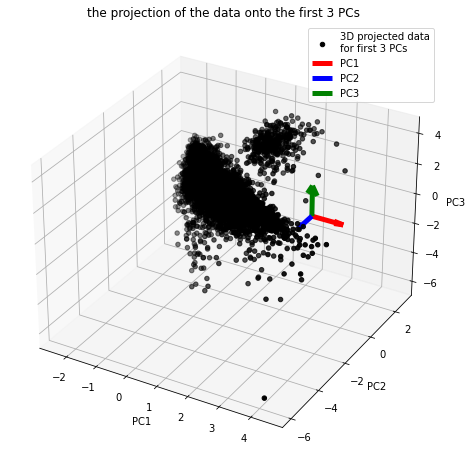

In [37]:
mean, std, data_normed, w, lambdas,first_d_df = myPca(train_data,best_d) # transform the data with the best D we got- project the data onto the first d PCs

# plot the data with the first 3 PCs on 3D plot
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
# plot the scaterr
ax.scatter(first_d_df[0],first_d_df[1],first_d_df[2],color='black', label='3D projected data\nfor first 3 PCs')
# add the arrows for the axises
plt.quiver(3,0,0,1,0,0,color='red',linewidth=5, label='PC1')
plt.quiver(3,0,0,0,-1,0,color='blue',linewidth=5, label='PC2')
plt.quiver(3,0,0,0,0,2,color='green',linewidth=5, label='PC3')

# add labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('the projection of the data onto the first 3 PCs')   # add title
plt.legend()
plt.show()


In [38]:
# Project the validation set onto the d top PCs
validation_normed = (validation_data-mean)/std              # normalize the validation data on the same paremters (mean&std)
projected_validation = validation_normed.dot(w[:best_d].T)  # project the validation data to our new d dim

# use KNN to predict the point’s class labels.
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(first_d_df,train_labels)
predicted = KNN.predict(projected_validation)
print ('The accuracy score on the validation data is: ',accuracy_score(validation_labels, predicted)) # the accuracy score we got

The accuracy score on the validation data is:  0.9188590418166713


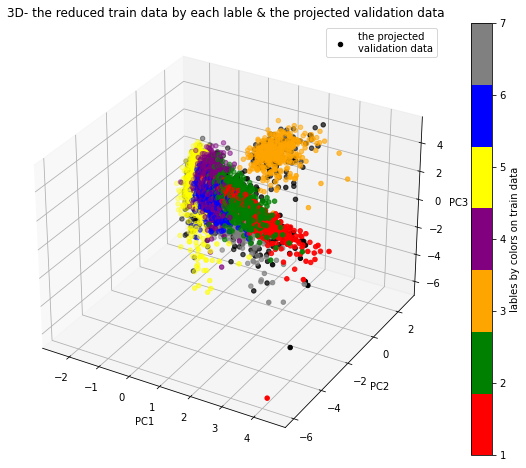

In [39]:
# Plot of the reduced train data in 3D and each label with differents colors.
# in black points is the projected validation data .
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
colors = ['red','green','orange','purple','yellow','blue','grey']
# plot the sactter for the train data in 3D- onto the first 3 Pcs
scat = ax.scatter(first_d_df[0],first_d_df[1],first_d_df[2], c=train_labels, cmap=matplotlib.colors.ListedColormap(colors))
# plot the scatter for the projected validation data
ax.scatter(projected_validation[0],projected_validation[1],projected_validation[2], c='black', label='the projected\nvalidation data')
# add lables
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
# add title
plt.title('3D- the reduced train data by each lable & the projected validation data')

# add legend 
N = len(list(dry_bean_df['Class'].unique()))  # number of unique values in the class column
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('lables by colors on train data')
plt.legend()

plt.show()

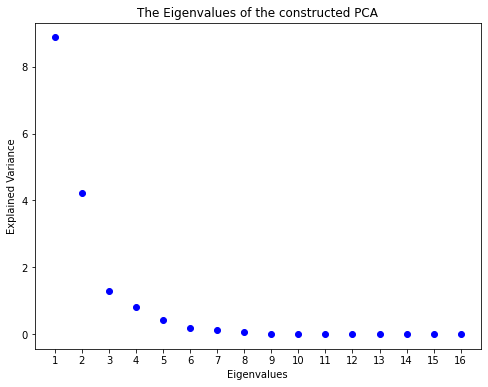

In [40]:
# Plot of the Eigenvalues of the constructed PCA.
fig = plt.figure(figsize=(8,6))
# plot the scatter of the 16 lambdas
plt.scatter(range(1,17),lambdas, color='Blue')
# add lables and title and set the x axis
plt.xlabel('Eigenvalues')
plt.ylabel('Explained Variance')
plt.title('The Eigenvalues of the constructed PCA')
plt.xticks(np.arange(1, 17, 1.0))
plt.show()

In [41]:
# Calculate the percentage of explained variance and the reconstruction error.
err = sum(lambdas[best_d+1:])
pov = sum(lambdas[:best_d])/sum(lambdas)
print('The below information is for dimension:',best_d)
print('The reconstruction error is:',err)
print('The  percentage of explained variance is:',pov)

The below information is for dimension: 10
The reconstruction error is: 0.0004632064719127703
The  percentage of explained variance is: 0.999903635142599


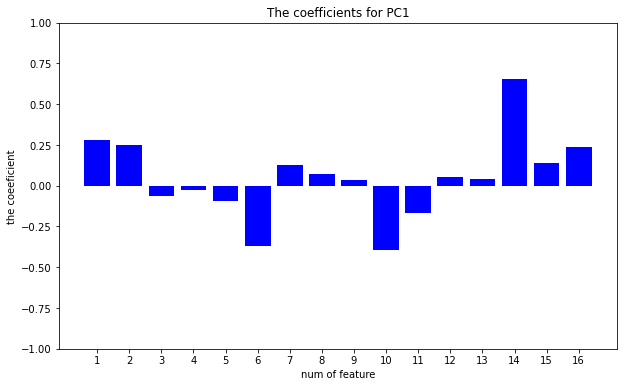

-----------------------------------------------------------------------------------------------


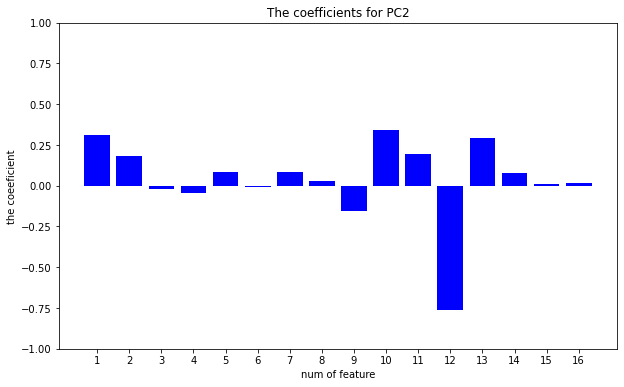

-----------------------------------------------------------------------------------------------


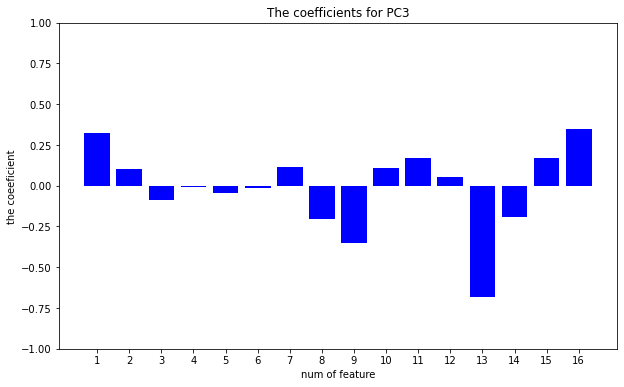

-----------------------------------------------------------------------------------------------


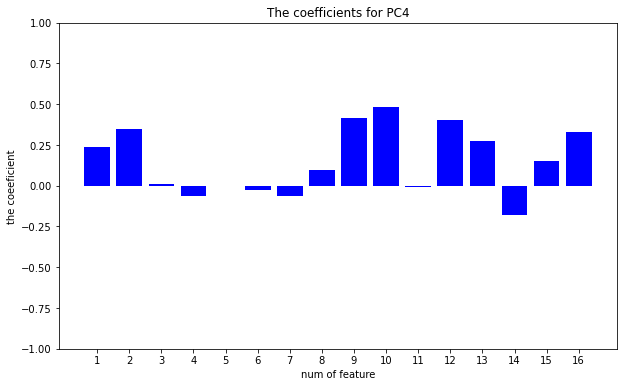

-----------------------------------------------------------------------------------------------


In [42]:
# plot of the coefficients of PC1, PC2, PC3 and PC4 
for i in range(4):
    plt.figure(figsize=(10,6))
    plt.ylim(-1,1)                            # change the y axis to be the same for all the plots
    plt.bar(range(1,17),w[i], color='Blue')   # plot the bars
    # add lables and title and set the x axis
    plt.xlabel('num of feature')
    plt.ylabel('the coeeficient')
    plt.title('The coefficients for PC'+str(i+1))
    plt.xticks(np.arange(1, 17, 1.0))
    plt.show()
    print ('-----------------------------------------------------------------------------------------------')

<b> Explanation: </b> <br> For PC3: we can see that feature 13 contributes the most. In addition features 1, 9 and 16 have a the most contribute after feature 13 but a small contribute. <br>
For PC4: features 10,9,12,16,2 are the most contribute features. From the 4 of them, 10 has the highest contribute (the rest in descending order from the left). <br>
We can see that features 9 and 16 common to PC3 and PC4 in the 4 most contribute features for them.